In [48]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [120]:
%run qBOLD_fun.ipynb

In [50]:
# Read median data from the csv
data = AverageFileReadandFilter("D:/Research/TUM/python_input/Glasser360_nw_values_qBOLD_GM_masked_allsubjects.csv", 
                         ["calc","control"], thres = 20)

In [51]:
preparation(["calc", "control"], 30)

In [129]:
# calculate relative change for CBF and CMRO2
applyFuncToDf(rc("CBF"), data3, colName = "rcCBF")
applyFuncToDf(rc("CMRO2"), data, colName = "rcCMRO2")

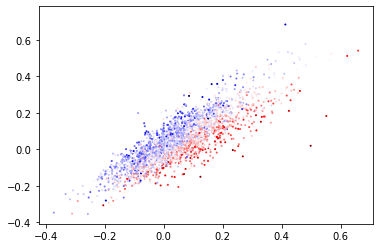

In [130]:
plt.scatter(data3.rcCBF, data3.rcFCMRO2calccontrol, c=data3.BOLDcalccontrol, s=1, cmap = "seismic", vmin=-2, vmax=2)

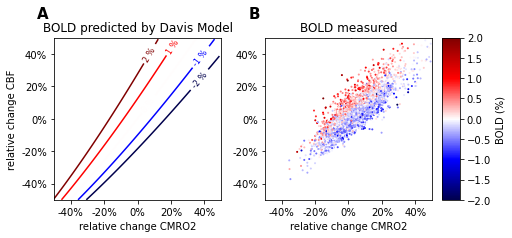

In [168]:
# Range of x and y axis
CMRO2 = np.arange(-0.5, 0.5, 0.01)
CBF = np.arange(-0.5, 0.5, 0.01)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(CMRO2, CBF)
  
fig, ax = plt.subplots(1, 2, figsize=(7, 3.2), constrained_layout=True)
  
a = 0.25; b=1; M=12

# Davis model
Z = M*(1-((Y+1)**(a-b))*(X+1)**b)

# cmap gives the color scheme, and levels define that 6 contour lines will be drawn for BOLD value between -0.2 and 0.2
CS = ax[0].contour(X, Y, Z, cmap = "seismic", levels=np.linspace(-2,2,5))
ax[0].clabel(CS, CS.levels, inline=True,fontsize=8, fmt=fmt)

# format in percentage
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"



#ax.clabel(CS, CS.levels, inline=True,fontsize=10)

ax[0].set_title('BOLD predicted by Davis Model')
ax[0].set_xlabel('relative change CMRO2')
ax[0].set_ylabel('relative change CBF')
ax[0].set_xlim(-0.5,0.5)
ax[0].set_ylim(-0.5,0.5)

plt.xlabel('relative change CMRO2')
ax[1].set_title('BOLD measured')

ax[1].set_xlim(-0.5,0.5)
ax[1].set_ylim(-0.5,0.5)

scatter = ax[1].scatter(data3.rcFCMRO2calccontrol, data3.rcCBF, c=data3.BOLDcalccontrol, s=1, cmap = "seismic", vmin=-2, vmax=2)
ticks = ticker.FuncFormatter('{0:.0%}'.format)
ax[0].xaxis.set_major_formatter(ticks)
ax[0].yaxis.set_major_formatter(ticks)
ax[1].xaxis.set_major_formatter(ticks)
ax[1].yaxis.set_major_formatter(ticks)

cbar = plt.colorbar(scatter)
cbar.set_label("BOLD (%)")
for n, axs in enumerate(ax):

    #axs.imshow(np.random.randn(10,10), interpolation='none')    
    axs.text(-0.1, 1.1, string.ascii_uppercase[n], transform=axs.transAxes, 
            size=15, weight='bold', verticalalignment='bottom')
plt.show()

In [102]:
# calculate BOLD/M
def ratio(row):
    return row["BOLD"+condG[0]+condG[1]]/row["M"+condG[1]]
applyFuncToDf(M, data)
applyFuncToDf(ratio, data3, colName = "BOLD_M")

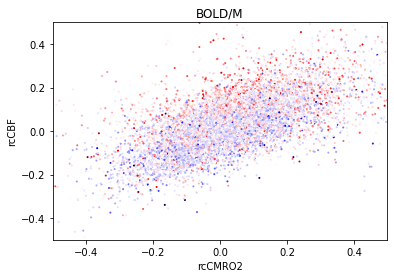

In [164]:
fig, ax = plt.subplots(1, 1)
data2 = data.loc[data["parcel"] == 1]
ax.scatter(data.rcCMRO2, data.rcCBF, c=data.BOLD_M, s=1, cmap = "seismic", vmin=-0.2, vmax=0.2)
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_title('BOLD/M')
ax.set_xlabel('rcCMRO2')
ax.set_ylabel('rcCBF')
plt.show()

In [3]:
# get the 11 subjects with CBV measurement
data3 = pd.DataFrame(data.dropna())

In [123]:
applyFuncToDf(rc("CBV"), data3, colName = "rcCBV")
applyFuncToDf(rc("OEF"), data3, colName = "rcOEF")

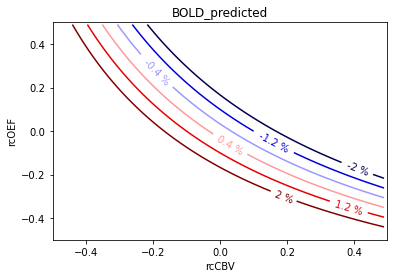

In [160]:
CBV = np.arange(-0.5, 0.5, 0.01)
OEF = np.arange(-0.5, 0.5, 0.01)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(CBV, OEF)
  
fig, ax = plt.subplots(1, 1)
  
a = 0.25; b=1; M=12
Z = M*(1-((Y+1)**(b))*(X+1))

# fmt = ticker.ScalarFormatter()
# fmt.create_dummy_axis()
# plots contour lines
CS = ax.contour(X, Y, Z, cmap = "seismic", levels=np.linspace(-2,2,6))
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

ax.clabel(CS, CS.levels, inline=True,fontsize=10, fmt=fmt)
#ax.clabel(CS, CS.levels, inline=True,fontsize=10)
ax.set_title('BOLD_predicted')
ax.set_xlabel('rcCBV')
ax.set_ylabel('rcOEF')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)

plt.show()

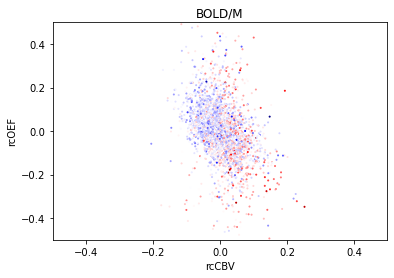

In [154]:
fig, ax = plt.subplots(1, 1)
ax.scatter(data3.rcCBV, data3.rcOEF, c=data3.BOLD_M, s=1, cmap = "seismic", vmin=-0.2, vmax=0.2)
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_title("BOLD/M")
ax.set_xlabel('rcCBV')
ax.set_ylabel('rcOEF')
plt.show()

rcCMRO2: (-0.2,-0.15)


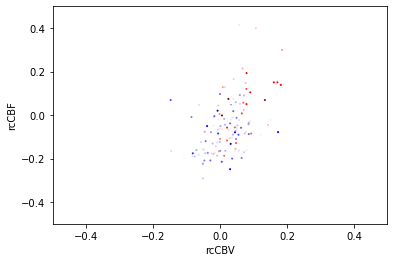

rcCMRO2: (-0.15,-0.1)


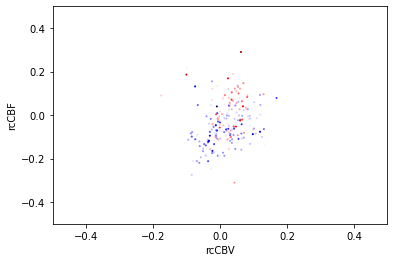

rcCMRO2: (-0.1,-0.05)


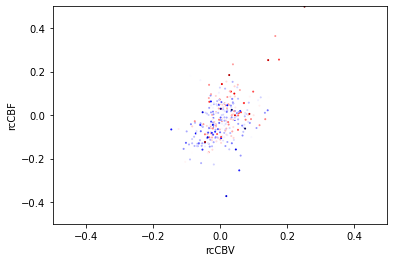

rcCMRO2: (-0.05,-0.0)


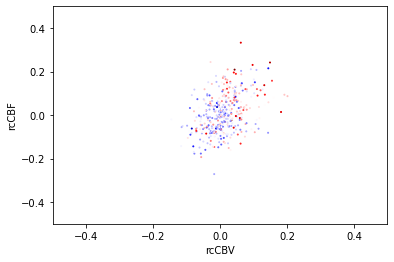

rcCMRO2: (-0.0,0.05)


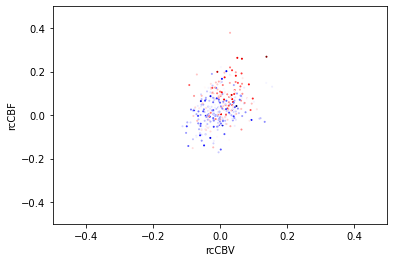

rcCMRO2: (0.05,0.1)


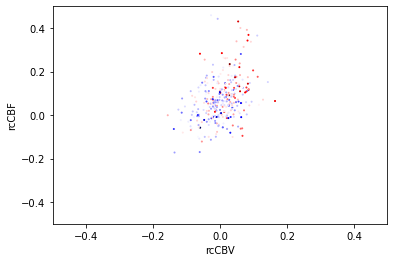

rcCMRO2: (0.1,0.15)


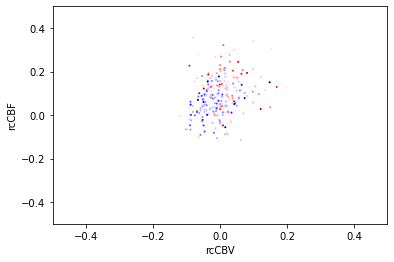

rcCMRO2: (0.15,0.2)


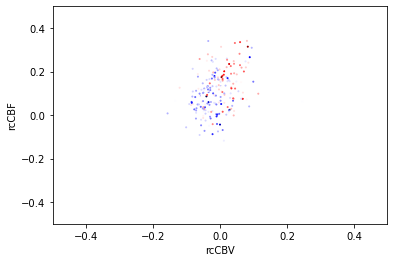

In [152]:
for i in np.arange(-0.2,0.2,0.05):
    mask = (i <= data3["rcCMRO2"]) & (data3["rcCMRO2"] < i+0.05)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(data3[mask].rcCBV, data3[mask].rcCBF, c=data3[mask].BOLD_M, s=1, cmap = "seismic", vmin=-0.1, vmax=0.1)
    ax.set_xlim(-0.5,0.5)
    ax.set_ylim(-0.5,0.5)
    ax.set_xlabel('rcCBV')
    ax.set_ylabel('rcCBF')
    print("rcCMRO2: ("+str(round(i, 2))+","+str(round(i+0.05, 2))+")")
    plt.show()

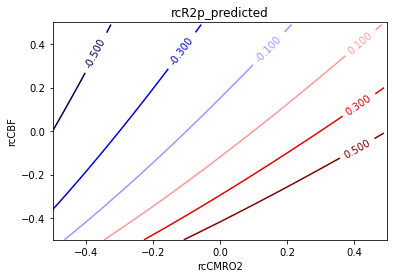

In [177]:
CMRO2 = np.arange(-0.5, 0.5, 0.01)
CBF = np.arange(-0.5, 0.5, 0.01)
  
# Creating 2-D grid of features
[X, Y] = np.meshgrid(CMRO2, CBF)
  
fig, ax = plt.subplots(1, 1)
  
a = 0.25; b=1;
Z = ((Y+1)**(a-b))*(X+1)**b - 1

CS = ax.contour(X, Y, Z, cmap = "seismic", levels=np.linspace(-0.5,0.5,6))
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s} \%" if plt.rcParams["text.usetex"] else f"{s} %"

#ax.clabel(CS, CS.levels, inline=True,fontsize=10, fmt=fmt)
ax.clabel(CS, CS.levels, inline=True,fontsize=10)

ax.set_title("rcR2p_predicted")
ax.set_xlabel('rcCMRO2')
ax.set_ylabel('rcCBF')
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)

plt.show()

In [65]:
applyFuncToDf(rc("R2p"), data, colName = "rcR2p")

In [79]:
data

par_cond,ID,parcel,nw,lobe,BOLDcalccontrol,CBVcalc,CBVcontrol,CMRO2calc,CMRO2control,T2scalc,...,OEFcontrol,R2pcalc,R2pcontrol,CBFcalc,CBFcontrol,rcCBF,rcCMRO2,rcFR2Pcalccontrol,rcR2p,rcFCMRO2calccontrol
0,19,1,Primary_Visual,Occ,-0.008106,NaN,5.907372,102.385808,97.081521,51.035183,...,0.326436,5.664603,5.678868,43.995262,42.823616,0.027360,0.054637,0.000476,-0.002512,NaN
1,19,3,Dorsal_Stream_Visual,Occ,-0.211505,NaN,6.531810,66.852616,74.658400,52.876347,...,0.265560,5.072213,4.854840,32.781628,37.463749,-0.124977,-0.104553,0.014522,0.044774,NaN
2,19,4,Early_Visual,Occ,-0.253023,NaN,6.081279,97.721869,92.296458,51.055172,...,0.335575,5.993818,5.733356,40.345741,39.025063,0.033842,0.058782,0.014711,0.045429,NaN
3,19,5,Early_Visual,Occ,-0.149586,NaN,5.260644,88.381855,82.461831,51.671459,...,0.360668,5.838673,5.966239,33.122654,30.146622,0.098719,0.071791,0.008357,-0.021381,NaN
4,19,6,Early_Visual,Occ,0.192579,NaN,4.488479,99.306782,96.748038,50.994534,...,0.409831,5.450542,5.281627,37.646717,35.180882,0.070090,0.026447,-0.012154,0.031982,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10951,68,354,Early_Auditory,Temp,-0.109058,7.577125,7.520064,169.957340,141.002172,48.231476,...,0.290537,7.489611,7.259988,69.988960,58.036507,0.205947,0.205353,0.005007,0.031629,0.221182
10952,68,355,Auditory_Association,Temp,-0.909914,5.751096,6.304585,147.389369,133.030806,50.317863,...,0.343939,7.050917,7.228111,46.912289,44.752094,0.048270,0.107934,0.041962,-0.024515,-0.003634
10953,68,356,Auditory_Association,Temp,-0.144316,5.338971,5.194466,97.294076,112.953534,53.311378,...,0.355077,5.991086,6.447046,38.290440,37.348370,0.025224,-0.138636,0.007462,-0.070724,0.061607
10954,68,359,Anterior_Cingulate_and_Medial_Prefrontal,Fr,-0.326825,4.551831,4.506928,124.730476,119.149336,56.255608,...,0.301842,5.082703,4.907077,48.715912,45.893433,0.061501,0.046842,0.022201,0.035790,0.095878


In [69]:
applyFuncToDf(FujitaR2pRelChange, data)

In [104]:
applyFuncToDf(FujitaCMRO2RelChange, data)

In [105]:
data4 = data.dropna()

In [87]:
data4

par_cond,ID,parcel,nw,lobe,BOLDcalccontrol,CBVcalc,CBVcontrol,CMRO2calc,CMRO2control,T2scalc,...,OEFcontrol,R2pcalc,R2pcontrol,CBFcalc,CBFcontrol,rcCBF,rcCMRO2,rcFR2Pcalccontrol,rcR2p,rcFCMRO2calccontrol
8067,56,1,Primary_Visual,Occ,0.858492,5.415279,5.177464,124.131490,83.142536,50.304691,...,0.373740,8.029919,6.285788,36.434250,30.524590,0.193603,0.492996,-0.045526,0.277472,0.191593
8068,56,4,Early_Visual,Occ,0.649538,4.525691,4.265050,153.116284,148.896980,50.475647,...,0.496679,7.554457,6.539030,42.319962,37.386185,0.131968,0.028337,-0.033111,0.155287,0.161373
8069,56,5,Early_Visual,Occ,0.666767,4.537271,4.138912,82.391046,116.005993,55.613758,...,0.522012,5.625060,6.746333,29.528070,26.987541,0.094137,-0.289769,-0.032945,-0.166205,0.159930
8070,56,6,Early_Visual,Occ,0.792145,4.020814,3.946236,78.986136,116.677089,57.022552,...,0.503439,3.803337,6.042918,33.464977,30.813948,0.086033,-0.323036,-0.043695,-0.370613,0.058206
8071,56,7,Ventral_Stream_Visual,Occ,0.392793,5.046083,4.868499,41.201686,58.498690,59.768230,...,0.421347,4.627429,6.187210,19.800858,17.314800,0.143580,-0.295682,-0.021162,-0.252098,0.160211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10951,68,354,Early_Auditory,Temp,-0.109058,7.577125,7.520064,169.957340,141.002172,48.231476,...,0.290537,7.489611,7.259988,69.988960,58.036507,0.205947,0.205353,0.005007,0.031629,0.221182
10952,68,355,Auditory_Association,Temp,-0.909914,5.751096,6.304585,147.389369,133.030806,50.317863,...,0.343939,7.050917,7.228111,46.912289,44.752094,0.048270,0.107934,0.041962,-0.024515,-0.003634
10953,68,356,Auditory_Association,Temp,-0.144316,5.338971,5.194466,97.294076,112.953534,53.311378,...,0.355077,5.991086,6.447046,38.290440,37.348370,0.025224,-0.138636,0.007462,-0.070724,0.061607
10954,68,359,Anterior_Cingulate_and_Medial_Prefrontal,Fr,-0.326825,4.551831,4.506928,124.730476,119.149336,56.255608,...,0.301842,5.082703,4.907077,48.715912,45.893433,0.061501,0.046842,0.022201,0.035790,0.095878


In [107]:
def CMRO2_4(row):
    ratioCBF = row["CBF"+condG[0]]/row["CBF"+condG[1]]
    ratioR2p = row["R2p"+condG[0]]/row["R2p"+condG[1]]
    ratioCBV = row["CBV"+condG[0]]/row["CBV"+condG[1]]
    return ratioCBF*ratioR2p/ratioCBV-1

In [108]:
applyFuncToDf(CMRO2_4, data, colName = "CMRO2_4")

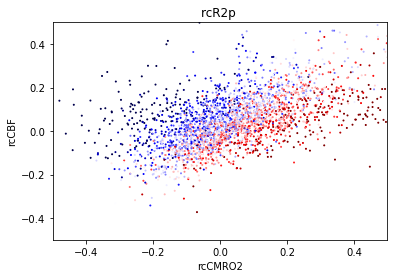

In [97]:
fig, ax = plt.subplots(1, 1)
ax.scatter(data4.rcCMRO2, data4.rcCBF, c=data4.rcR2p, s=1, cmap = "seismic", vmin=-0.2, vmax=0.2)
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_title("rcR2p ")
ax.set_xlabel('rcCMRO2')
ax.set_ylabel('rcCBF')
plt.show()

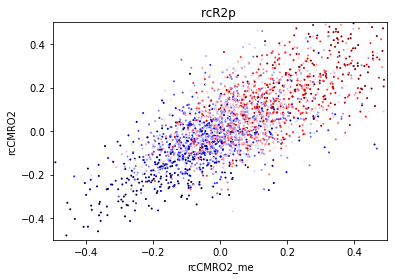

In [110]:
fig, ax = plt.subplots(1, 1)
ax.scatter(data4.CMRO2_4, data4.rcCMRO2, c=data4.rcR2p, s=1, cmap = "seismic", vmin=-0.2, vmax=0.2)
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_title("rcR2p ")
ax.set_xlabel('rcCMRO2_me')
ax.set_ylabel('rcCMRO2')
plt.show()

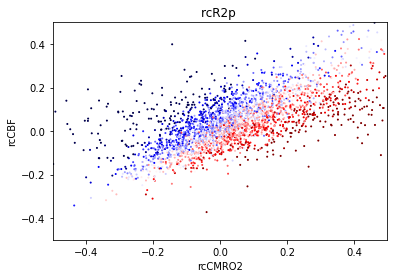

In [109]:
fig, ax = plt.subplots(1, 1)
ax.scatter(data4.CMRO2_4, data4.rcCBF, c=data4.rcR2p, s=1, cmap = "seismic", vmin=-0.2, vmax=0.2)
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_title("rcR2p ")
ax.set_xlabel('rcCMRO2')
ax.set_ylabel('rcCBF')
plt.show()

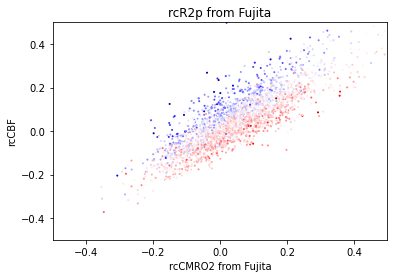

In [106]:
fig, ax = plt.subplots(1, 1)
ax.scatter(data4.rcFCMRO2calccontrol, data4.rcCBF, c=data4.rcFR2Pcalccontrol, s=1, cmap = "seismic", vmin=-0.2, vmax=0.2)
ax.set_xlim(-0.5,0.5)
ax.set_ylim(-0.5,0.5)
ax.set_title("rcR2p from Fujita")
ax.set_xlabel('rcCMRO2 from Fujita')
ax.set_ylabel('rcCBF')
plt.show()

In [75]:
applyFuncToDf(rc("R2p"), data3, colName="rcR2p")
applyFuncToDf(rc("CBF"), data3, colName="rcCBF")
applyFuncToDf(rc("CBV"), data3, colName="rcCBV")
applyFuncToDf(rc("OEF"), data3, colName="rcOEF")

In [121]:
# Calculate CMRO2 using 3 different approaches
applyFuncToDf(DavisCMRO2RelChange, data3, b=1, m=12, a=0.25)
applyFuncToDf(rc("CMRO2"), data3, colName = "rcCMRO2")
applyFuncToDf(FujitaCMRO2RelChange, data3)

In [122]:
data3

par_cond,ID,parcel,nw,lobe,BOLDcalccontrol,CBVcalc,CBVcontrol,CMRO2calc,CMRO2control,T2scalc,...,CBFcontrol,rcR2p,rcCBF,rcCBV,rcOEF,rcDCMRO2calccontrol_b1,rcCMRO2,rcFCMRO2calccontrol,rcDCMRO2calccontrol_a0.25_b1_M<function M at 0x00000200CD72C670>,rcDCMRO2calccontrol_a0.25_b1_M12
8067,56,1,Primary_Visual,Occ,0.858492,5.415279,5.177464,124.131490,83.142536,50.304691,...,30.524590,0.277472,0.193603,0.045933,0.236975,0.036918,0.492996,0.089232,0.060249,0.060249
8068,56,4,Early_Visual,Occ,0.649538,4.525691,4.265050,153.116284,148.896980,50.475647,...,37.386185,0.155287,0.131968,0.061111,0.039652,0.033480,0.028337,0.031454,0.038025,0.038025
8069,56,5,Early_Visual,Occ,0.666767,4.537271,4.138912,82.391046,116.005993,55.613758,...,26.987541,-0.166205,0.094137,0.096247,-0.293664,0.010400,-0.289769,-0.034806,0.010361,0.010361
8070,56,6,Early_Visual,Occ,0.792145,4.020814,3.946236,78.986136,116.677089,57.022552,...,30.813948,-0.370613,0.086033,0.018899,-0.356774,-0.000107,-0.323036,0.019315,-0.006372,-0.006372
8071,56,7,Ventral_Stream_Visual,Occ,0.392793,5.046083,4.868499,41.201686,58.498690,59.768230,...,17.314800,-0.252098,0.143580,0.036476,-0.340801,0.030471,-0.295682,0.079986,0.069661,0.069661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10951,68,354,Early_Auditory,Temp,-0.109058,7.577125,7.520064,169.957340,141.002172,48.231476,...,58.036507,0.031629,0.205947,0.007588,-0.012242,0.097634,0.205353,0.202859,0.161249,0.161249
10952,68,355,Auditory_Association,Temp,-0.909914,5.751096,6.304585,147.389369,133.030806,50.317863,...,44.752094,-0.024515,0.048270,-0.087792,0.108931,0.066181,0.107934,0.197377,0.114544,0.114544
10953,68,356,Auditory_Association,Temp,-0.144316,5.338971,5.194466,97.294076,112.953534,53.311378,...,37.348370,-0.070724,0.025224,0.027819,-0.101600,0.019562,-0.138636,0.004918,0.031112,0.031112
10954,68,359,Anterior_Cingulate_and_Medial_Prefrontal,Fr,-0.326825,4.551831,4.506928,124.730476,119.149336,56.255608,...,45.893433,0.035790,0.061501,0.009963,0.021618,0.056475,0.046842,0.074363,0.074262,0.074262


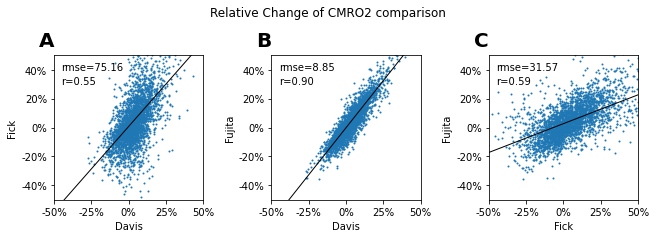

In [211]:
import string
fig, ax = plt.subplots(1, 3, figsize=(9, 3.2), constrained_layout=True)
#fig.tight_layout()
ax[0].scatter(data3["rcDCMRO2calccontrol_a0.25_b1_M12"], data3.rcCMRO2, s=1)
ax[1].scatter(data3["rcDCMRO2calccontrol_a0.25_b1_M12"], data3.rcFCMRO2calccontrol, s=1)
ax[2].scatter(data3.rcCMRO2, data3.rcFCMRO2calccontrol, s=1)
ax[0].set_xlabel('Davis')
ax[0].set_ylabel('Fick')
ax[1].set_xlabel('Davis')
ax[1].set_ylabel('Fujita')
ax[2].set_xlabel('Fick')
ax[2].set_ylabel('Fujita')

ax[0].set_xlim(-0.5,0.5)
ax[0].set_ylim(-0.5,0.5)
ax[1].set_xlim(-0.5,0.5)
ax[1].set_ylim(-0.5,0.5)
ax[2].set_xlim(-0.5,0.5)
ax[2].set_ylim(-0.5,0.5)

ticks = ticker.FuncFormatter('{0:.0%}'.format)
ax[0].xaxis.set_major_formatter(ticks)
ax[0].yaxis.set_major_formatter(ticks)
ax[1].xaxis.set_major_formatter(ticks)
ax[1].yaxis.set_major_formatter(ticks)
ax[2].xaxis.set_major_formatter(ticks)
ax[2].yaxis.set_major_formatter(ticks)

for n, axs in enumerate(ax):

    #axs.imshow(np.random.randn(10,10), interpolation='none')    
    axs.text(-0.1, 1.1, string.ascii_uppercase[n], transform=axs.transAxes, 
            size=20, weight='bold', verticalalignment='center')
fig.suptitle('Relative Change of CMRO2 comparison')

b, a = np.polyfit(data3["rcDCMRO2calccontrol_a0.25_b1_M12"], data3.rcCMRO2, deg=1)

# Create sequence of 100 numbers from 0 to 100 
xseq = np.linspace(-0.5, 0.5, num=100)

# Plot regression line

r = np.polyfit(data3["rcDCMRO2calccontrol_a0.25_b1_M12"], data3.rcCMRO2, deg=1, full=True)[1][0]
rr = np.corrcoef(data3["rcDCMRO2calccontrol_a0.25_b1_M12"], data3.rcCMRO2)[0][1]
ax[0].plot(xseq, a + b * xseq, color="k", lw=1)
ax[0].annotate("rmse="+f"{r:.2f}",(-0.45,0.4))
ax[0].annotate("r="+f"{rr:.2f}",(-0.45,0.3))
# ax[0].legend(loc="upper left")

b1, a1 = np.polyfit(data3["rcDCMRO2calccontrol_a0.25_b1_M12"], data3.rcFCMRO2calccontrol, deg=1)
ax[1].plot(xseq, a1 + b1 * xseq, color="k", lw=1)
r1= np.polyfit(data3["rcDCMRO2calccontrol_a0.25_b1_M12"], data3.rcFCMRO2calccontrol, deg=1, full=True)[1][0]
rr1 = np.corrcoef(data3["rcDCMRO2calccontrol_a0.25_b1_M12"], data3.rcFCMRO2calccontrol)[0][1]
ax[1].annotate("rmse="+f"{r1:.2f}",(-0.45,0.4))
ax[1].annotate("r="+f"{rr1:.2f}",(-0.45,0.3))

b2, a2 = np.polyfit(data3.rcCMRO2, data3.rcFCMRO2calccontrol, deg=1)
ax[2].plot(xseq, a2 + b2 * xseq, color="k", lw=1)
r2 = np.polyfit(data3.rcCMRO2, data3.rcFCMRO2calccontrol, deg=1, full=True)[1][0]
rr2 = np.corrcoef(data3.rcCMRO2, data3.rcFCMRO2calccontrol)[0][1]
ax[2].annotate("rmse="+f"{r2:.2f}",(-0.45,0.4))
ax[2].annotate("r="+f"{rr2:.2f}",(-0.45,0.3))
plt.savefig('fig3.png')

In [209]:
np.corrcoef(data3["rcDCMRO2calccontrol_a0.25_b1_M12"], data3.rcCMRO2)[0][1]

0.5485152650452404